In [2]:
import IPython
import numpy as np
import pandas as pd
from matplotlib import __version__ as plt_version
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pydotplus
%matplotlib inline

sns.set_style("whitegrid")
sns.set_context('talk')

np.random.seed(42)
# imports for Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve, validation_curve


# import for KNN
from sklearn.neighbors import KNeighborsClassifier

# import for SVM
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# imports for Neural Network
import tensorflow as tf
import keras

from tqdm import tqdm

Using TensorFlow backend.


In [3]:
# Requirements to run this code 
print("Anaconda Notebook version: ",IPython.__version__ )
print("numpy version: ", np.__version__)
print("pandas version: ",pd.__version__)
print("matplotlib version: ", plt_version)
print("Sci-kit Learn version: ", sklearn.__version__)
print("Seaborn version: ", sns.__version__)
print("Grphviz version", graphviz.__version__)
print("Tensorflow Version", tf.__version__)
print("Keras Version", keras.__version__)

Anaconda Notebook version:  5.6.0
numpy version:  1.15.4
pandas version:  0.23.1
matplotlib version:  2.0.0
Sci-kit Learn version:  0.20.0
Seaborn version:  0.9.0
Grphviz version 0.10.1
Tensorflow Version 1.12.0
Keras Version 2.2.4


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [5]:
# load  the training data from 
train_data = pd.read_csv(url,
                         header=None,
                         names=['age', 'workclass','fnlwgt','education','education_num','maritalstatus',
                                'occupation','relationship','race','sex','capital_gain','capital_loss',
                                'hours_per_week','native_country', 'income'],
                         na_values = ' ?')
train_data.head()


,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# load  the training data from 
test_data = pd.read_csv(url_test,
                         header=None,
                         names=['age', 'workclass','fnlwgt','education','education_num','maritalstatus',
                                'occupation','relationship','race','sex','capital_gain','capital_loss',
                                'hours_per_week','native_country', 'income'],
                         na_values = ' ?')
test_data.head()

,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
maritalstatus     32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
age               16282 non-null object
workclass         15318 non-null object
fnlwgt            16281 non-null float64
education         16281 non-null object
education_num     16281 non-null float64
maritalstatus     16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null float64
capital_loss      16281 non-null float64
hours_per_week    16281 non-null float64
native_country    16007 non-null object
income            16281 non-null object
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


## 2. Data Preprocessing ##

In [9]:
def preprocess_data(data):
    ''' Change the categorical columns to numeric '''
    data = data.dropna()
    data = data.drop_duplicates()
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = data[column].astype('category').cat.codes
    return data
    

In [11]:
train_df = preprocess_data(train_data)
test_df = preprocess_data(test_data)

In [12]:
print(train_df.shape)
train_df.head()

(30139, 15)


,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [13]:
print(test_df.shape)
test_df.head()

(15055, 15)


,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,8,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
2,21,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
3,11,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
4,27,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
6,17,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0


## 3. Exploratory Data Analysis

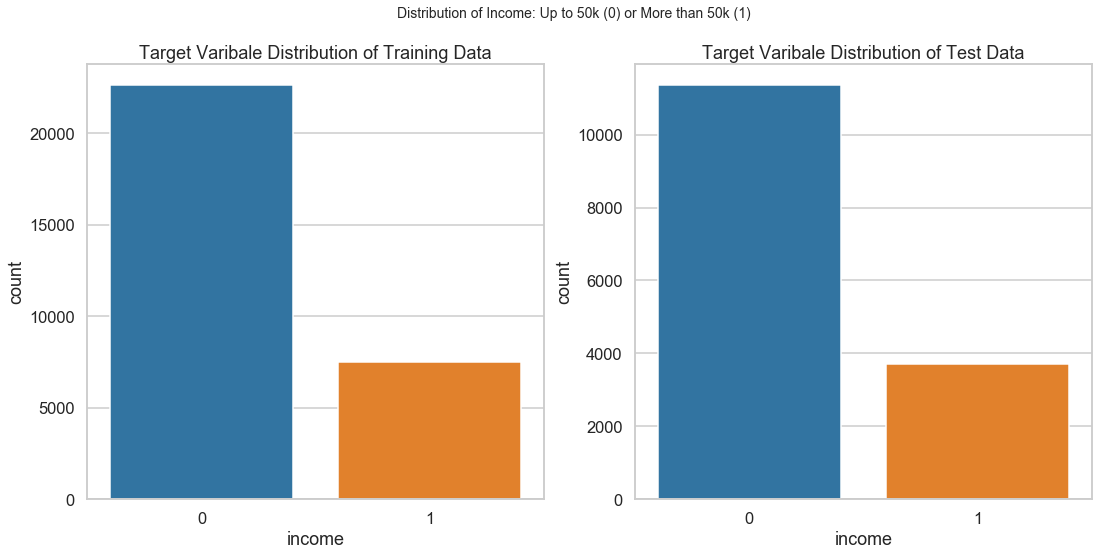

Test data: People with income more than 50k : 7506 
People with income 50k or less: 22633


In [15]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
sns.countplot('income', data=train_df)
plt.title('Target Varibale Distribution of Training Data')

plt.subplot(122)
sns.countplot('income', data=test_df)
plt.title('Target Varibale Distribution of Test Data')

plt.suptitle('Distribution of Income: Up to 50k (0) or More than 50k (1)', size=14)
plt.show()
print("Test data: People with income more than 50k : {} \nPeople with income 50k or less: {}".format(sum(train_df.income), -sum(train_df.income-1)))

In [16]:
# generating features and target variable for training and testing
X = train_df.drop(columns=['income'], axis=0)
y = train_df.income

X_test = test_df.drop(columns='income',axis=0)
y_test = test_df.income

# 4. Experiments and Results 

## Artificial Neural Network

In [19]:
from keras.models import Sequential, save_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD, adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Effect of number of layers

In [24]:

np.random.seed(45)
# Create the new model: model_2
input_shape = (X_scaled.shape[1],)
early_stopping_monitor = EarlyStopping(patience=20)

# Create the new model: model_2
model_tuned = Sequential()

# Add the hidden layers
model_tuned.add(Dense(50, activation='relu', input_shape=input_shape))
model_tuned.add(Dense(50, activation='relu'))

# Add the output layer
model_tuned.add(Dense(2, activation='sigmoid'))

# Compile model
model_tuned.compile(optimizer=SGD(lr =0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model

model_training = model_tuned.fit(X_scaled, to_categorical(y), epochs=40, validation_split=0.3, verbose=False,callbacks=[early_stopping_monitor])
loss, acc = model_tuned.evaluate(X_test_scaled, to_categorical(y_test), verbose=False)

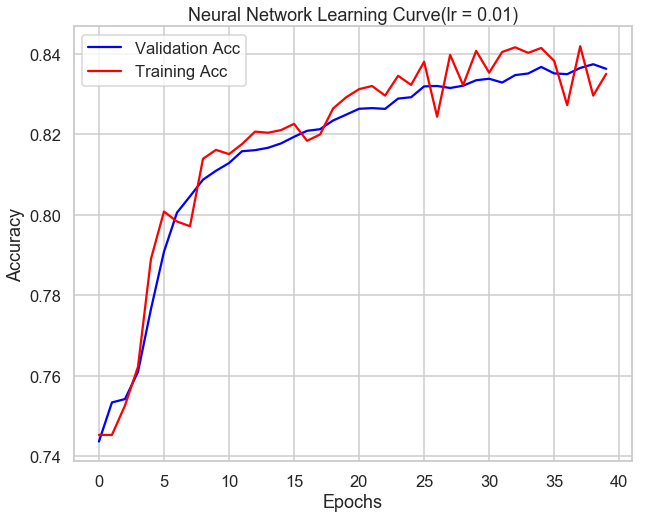

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(model_training.history['acc'], color='b', label='Validation Acc')
plt.plot(model_training.history['val_acc'], color='r',label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(lr = 0.01)')
plt.show()

## K-Means Clustering


### KMeans clustering with Euclidean Distance

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score

100%|██████████| 18/18 [01:08<00:00,  3.83s/it]


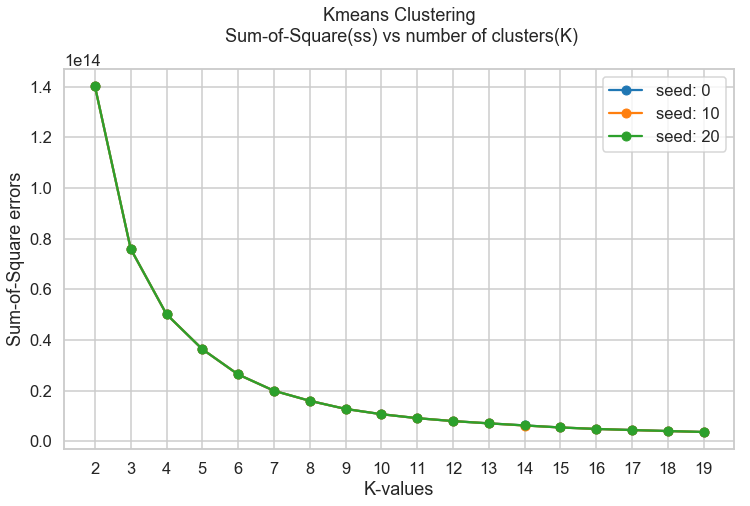

In [35]:
# Write code that applies the KMeans clustering method from scikit-learn to this matrix.
# apply elbow method to find the best K value

plt.figure(figsize=(12,7))
for rand in [0, 10, 20]:
    ks = []
    ss = []
    for k in tqdm(range(2, 20)):
        kmeans = KMeans(n_clusters=k, random_state=rand)
        kmeans.fit(X)
        ks.append(k)
        ss.append(kmeans.inertia_)
    plt.plot(ks, ss, marker='o', label='seed: {}'.format(rand) )
plt.title('Kmeans Clustering\n Sum-of-Square(ss) vs number of clusters(K)\n')
plt.xlabel('K-values')
plt.xticks(ks)
plt.ylabel('Sum-of-Square errors')
plt.legend()
plt.show()

100%|██████████| 18/18 [04:59<00:00, 16.62s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


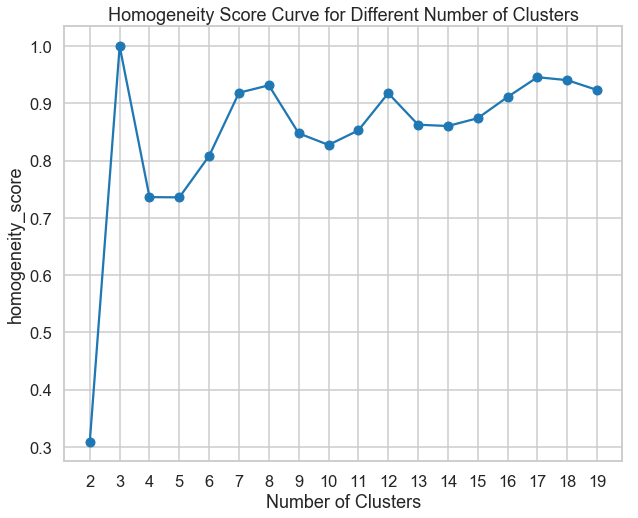

In [36]:
silhouette_avgs = []
hs = []
range_n_clusters = range(2, 20)

for n_clusters in tqdm(range_n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))

# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, hs,marker='o')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters')
plt.legend()
plt.show()

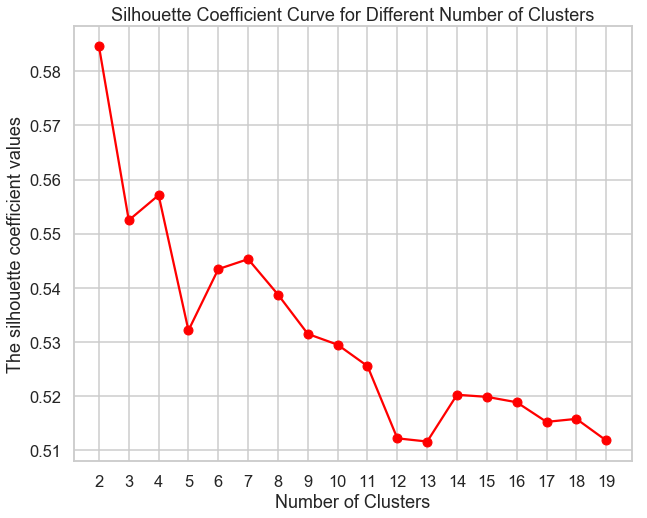

In [37]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters')
plt.show()

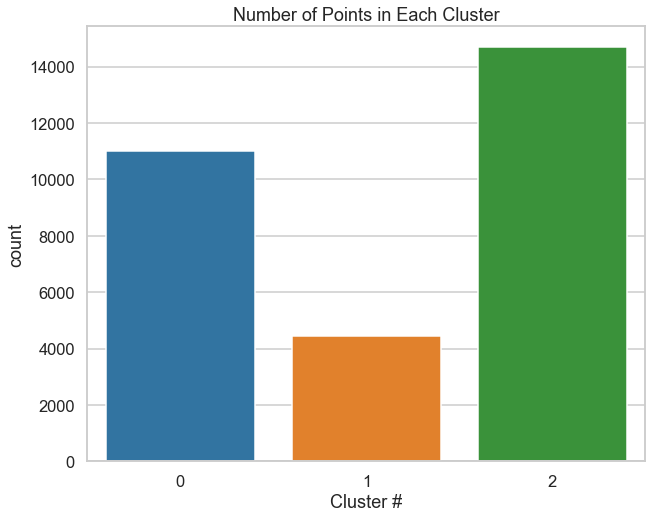

In [34]:
kmeans = KMeans(n_clusters=3, random_state=10)
y = kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster")
plt.xlabel("Cluster #")
# plt.xticks(range(0,17),range(1,28))
plt.show()

## Gaussian Mixture ( EM) 

In [38]:
from sklearn.mixture import GaussianMixture

100%|██████████| 18/18 [01:10<00:00,  3.94s/it]


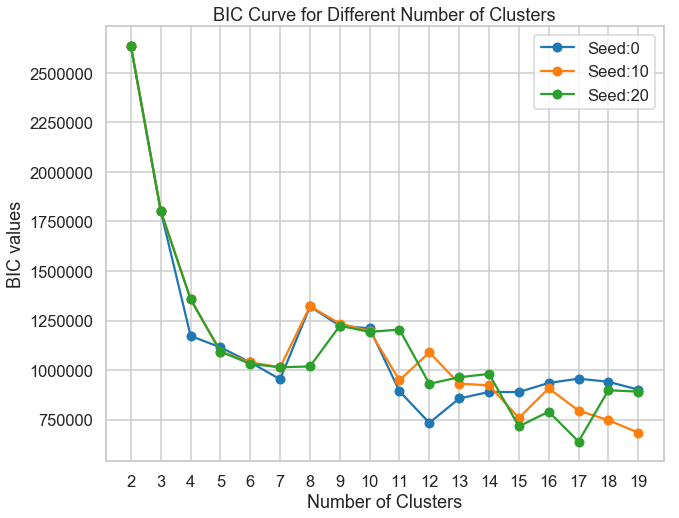

In [39]:
range_n_clusters = range(2, 20)
plt.figure(figsize=(10,8))
for rand in [0, 10, 20]:
    bic = []
    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=rand)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        bic.append(clusterer.bic(X))
    plt.plot(range_n_clusters, bic, marker='o', label='Seed:{}'.format(rand))
    
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("BIC values")
plt.title('BIC Curve for Different Number of Clusters')
plt.legend()
plt.show()

100%|██████████| 18/18 [05:38<00:00, 18.78s/it]


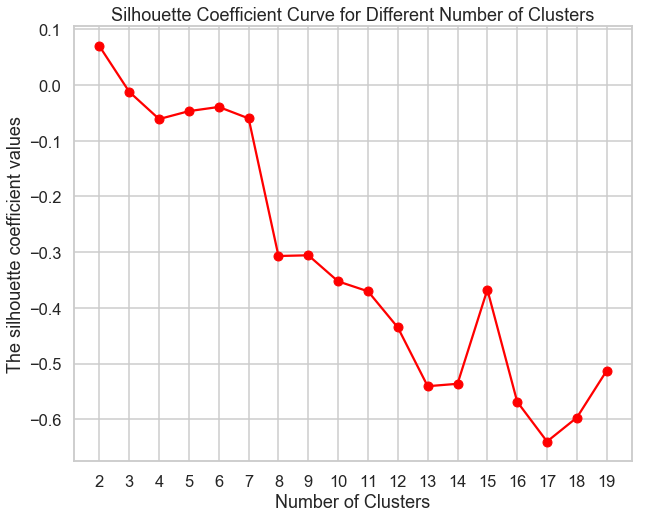

In [40]:
silhouette_avgs = []
hs = []
range_n_clusters = range(2, 20)

for n_clusters in tqdm(range_n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))

plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


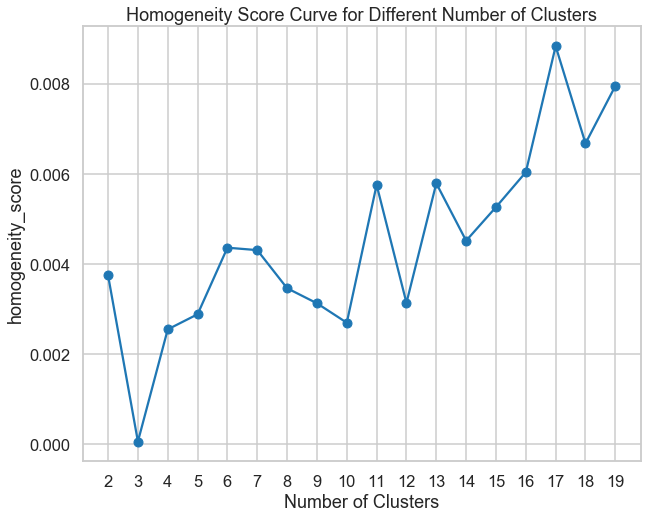

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, hs,marker='o')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters')
plt.legend()
plt.show()

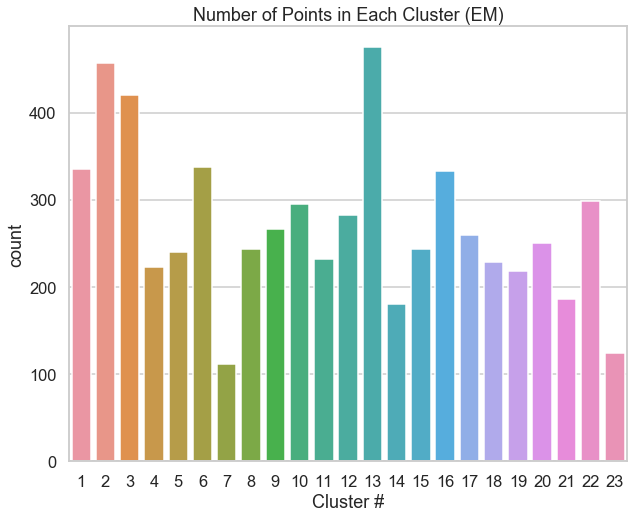

In [513]:
gmm = GaussianMixture(n_components=23, random_state=0)
y = gmm.fit_predict(X)
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster (EM)")
plt.xlabel("Cluster #")
plt.xticks(range(0,23),range(1,24))
plt.show()

## PCA

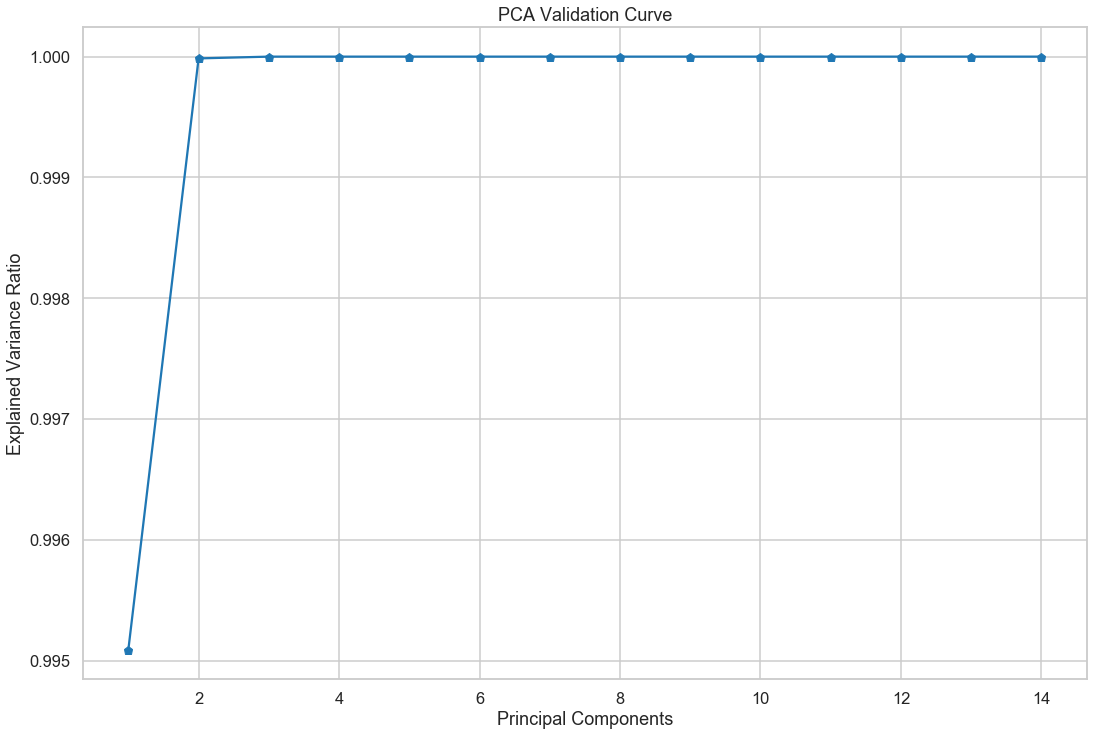

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(figsize=(18, 12))
plt.plot(range(1,15),np.cumsum(pca.explained_variance_ratio_), marker='p')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Validation Curve')
plt.show()

In [43]:
eig_val, eig_vec = np.linalg.eig(pca.get_covariance())

In [44]:
def kmeans_curves(X, range_n_clusters):
    silhouette_avgs = []
    hs = []

    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))
    return hs, silhouette_avgs

In [45]:
pca  = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [47]:
hs, silhouette_avgs = kmeans_curves(X=X_new, range_n_clusters=range(2, 20))


100%|██████████| 18/18 [05:00<00:00, 16.67s/it]


In [48]:
def elbow_curve(X, kk):
    ks = []
    ss = []
    for k in tqdm(kk):
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(X)
        ks.append(k)
        ss.append(kmeans.inertia_)
    plt.figure(figsize=(10,8))
    plt.plot(ks, ss, marker='o' )
    plt.title('Kmeans Clustering\n Sum-of-Square(ss) vs number of clusters(K)\n')
    plt.xlabel('K-values')
    plt.xticks(ks)
    plt.ylabel('Sum-of-Square errors')
    plt.legend()
    plt.show()

100%|██████████| 18/18 [00:42<00:00,  2.34s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


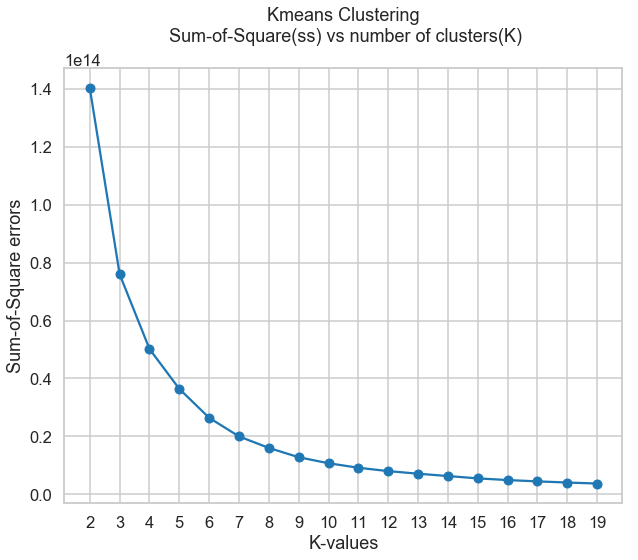

In [49]:
elbow_curve(X=X_new, kk=range(2,20))

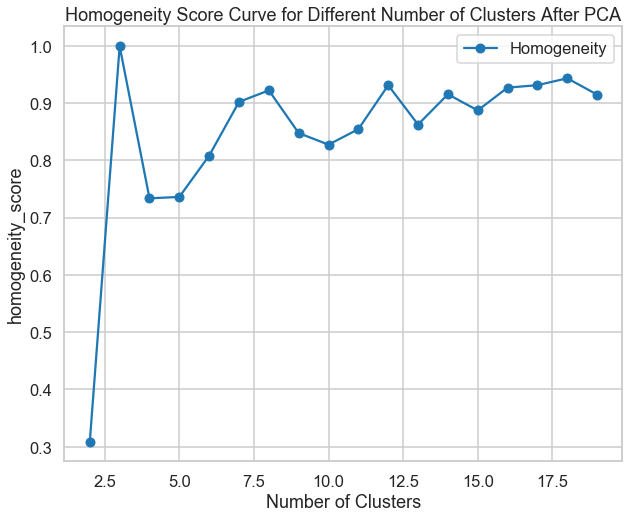

In [50]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(2,20), hs,marker='o', label='Homogeneity')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters After PCA')
plt.legend()
plt.show()

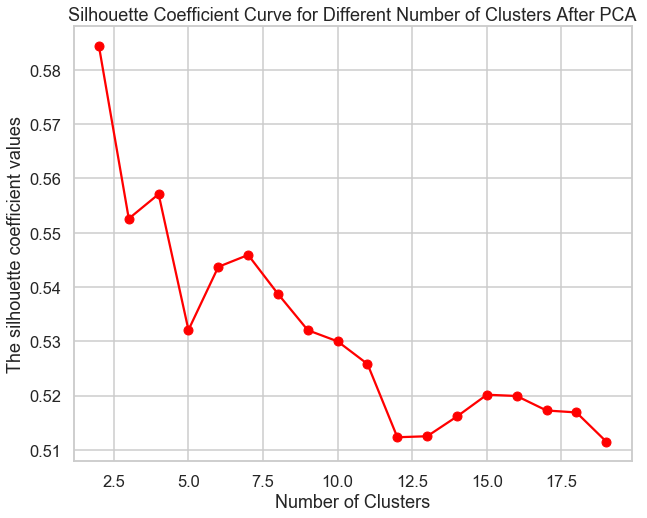

In [51]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(2, 20), silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters After PCA')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=28, random_state=0)
y = kmeans.fit_predict(X_new)

plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster After PCA")
plt.xlabel("Cluster #")
plt.xticks(range(0,25),range(1,26))
plt.show()

In [53]:
def elbow_em_curve(X,range_n_clusters = range(2, 20)):
    bic = []
    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        bic.append(clusterer.bic(X))
        
    plt.figure(figsize=(10,8))
    plt.plot(range_n_clusters, bic, marker='o')
    plt.xlabel("Number of Clusters")
    plt.xticks(range_n_clusters)
    plt.ylabel("BIC values")
    plt.title('BIC Curve for Different Number of Clusters')
    plt.legend()
    plt.show()
    
    
#-------------------------------------------------------------

def em_curves(X, range_n_clusters):
    silhouette_avgs = []
    hs = []
    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))
    return hs, silhouette_avgs



100%|██████████| 18/18 [00:30<00:00,  1.67s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


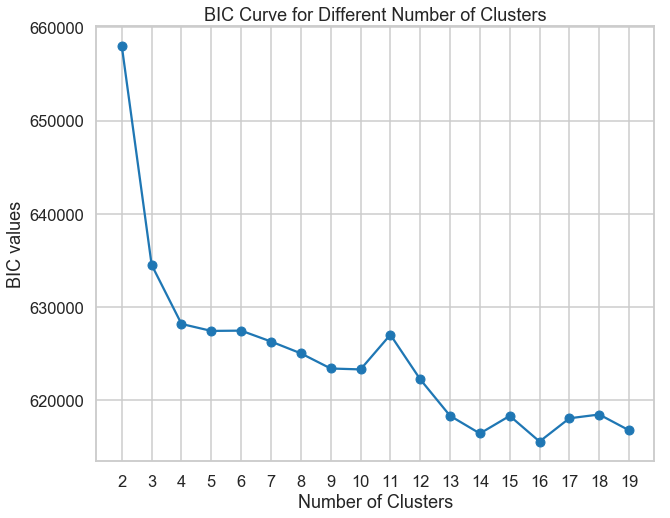

In [54]:
elbow_em_curve(X_new)

In [55]:
pca_hs, pca_sil = em_curves(X_new, range_n_clusters= range(2, 20))

100%|██████████| 18/18 [04:46<00:00, 15.93s/it]


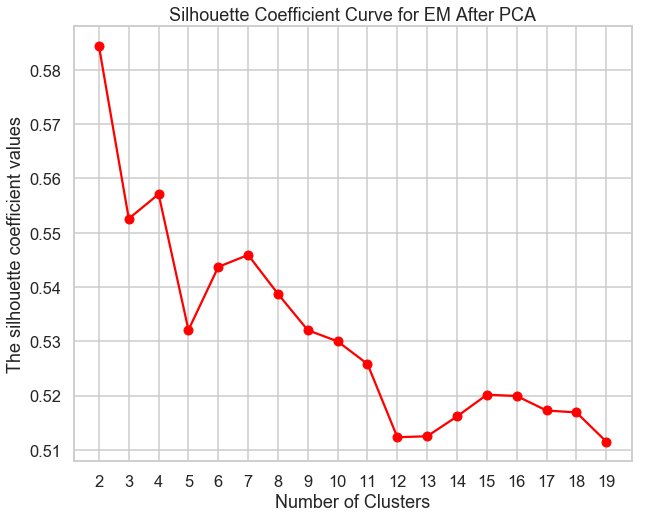

In [57]:
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for EM After PCA')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


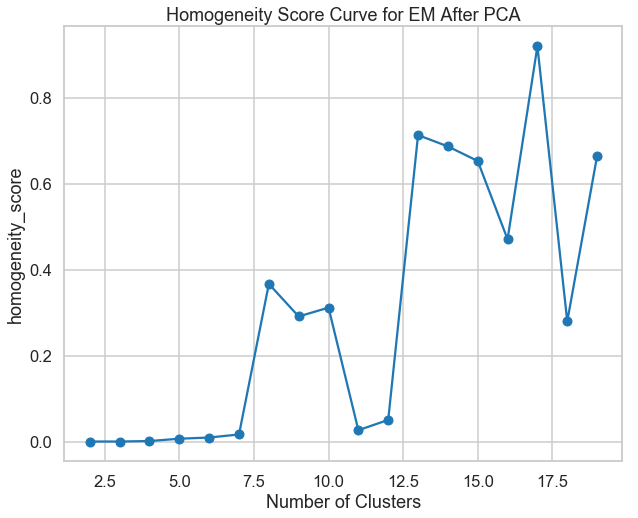

In [58]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(2,20), pca_hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for EM After PCA')
plt.legend()
plt.show()

## ICA

In [59]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

In [60]:
kurt = []
for comp in tqdm(range(1, 14)):
    ica = FastICA(n_components=comp, random_state=10)
    X_ica = ica.fit_transform(X)
    kurt.append(np.mean(kurtosis(X_ica)))

100%|██████████| 13/13 [00:01<00:00, 11.64it/s]


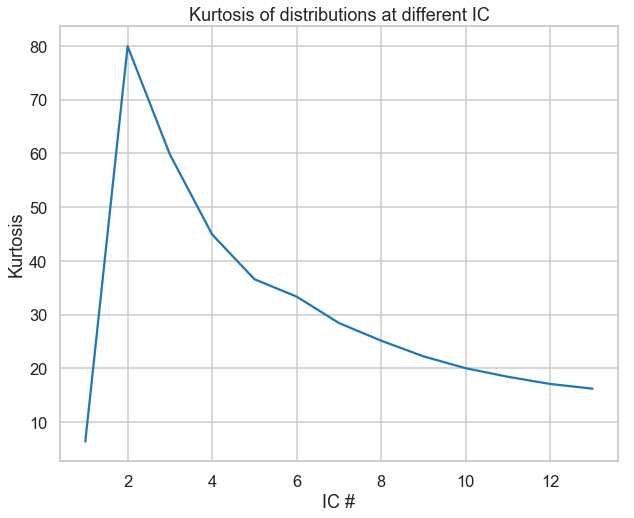

In [61]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 14), kurt)
plt.title('Kurtosis of distributions at different IC')
plt.xlabel('IC #')
plt.ylabel('Kurtosis')
plt.show()


In [62]:
ica = FastICA(n_components=2, random_state=10)
X_ica = ica.fit_transform(X)

100%|██████████| 18/18 [00:40<00:00,  2.27s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


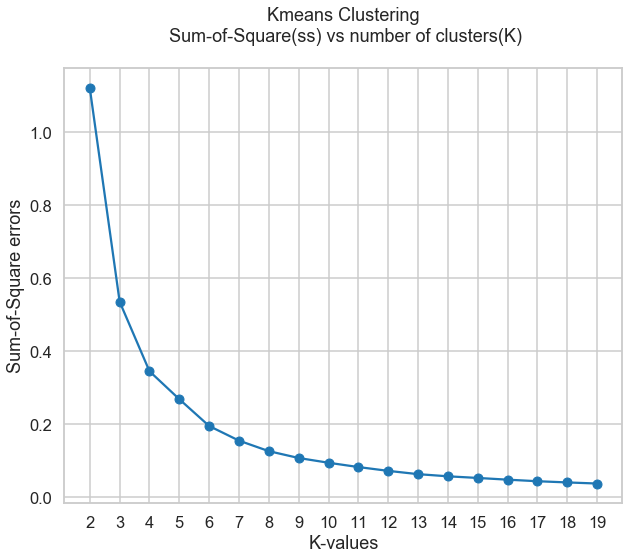

In [63]:
elbow_curve(X=X_ica, kk=range(2, 20))

In [64]:
hs, silhouette_avgs = kmeans_curves(X=X_ica, range_n_clusters=range(2, 20))

100%|██████████| 18/18 [04:54<00:00, 16.35s/it]


C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


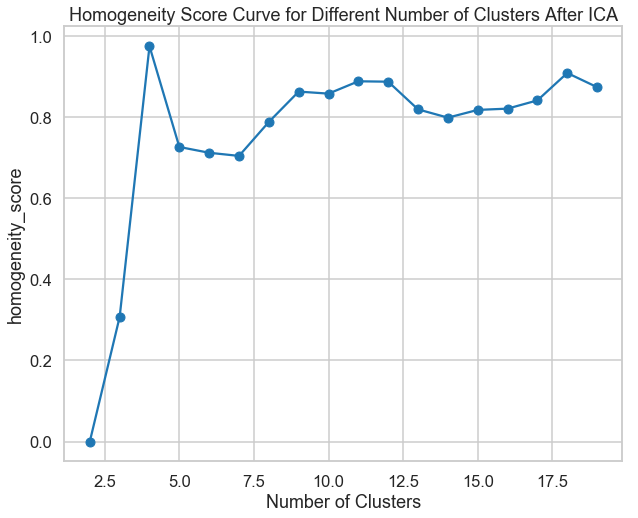

In [65]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(2,20), hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters After ICA')
plt.legend()
plt.show()

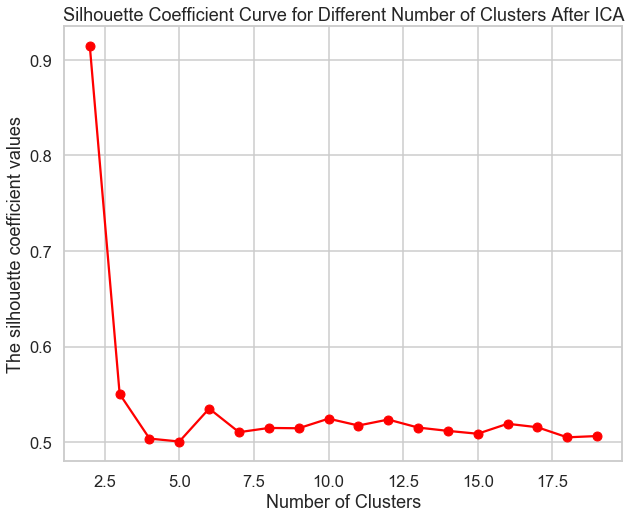

In [66]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(2, 20), silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters After ICA')
plt.show()

100%|██████████| 18/18 [00:09<00:00,  1.98it/s]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


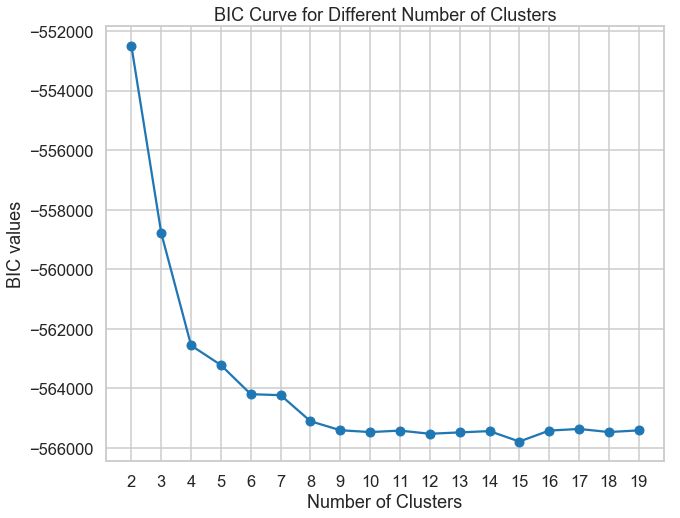

In [67]:
elbow_em_curve(X_ica)


In [69]:
ica_hs, ica_sil = em_curves(X_ica,range_n_clusters = range(13, 40))

100%|██████████| 27/27 [06:39<00:00, 14.79s/it]


ValueError: x and y must have same first dimension, but have shapes (18,) and (27,)

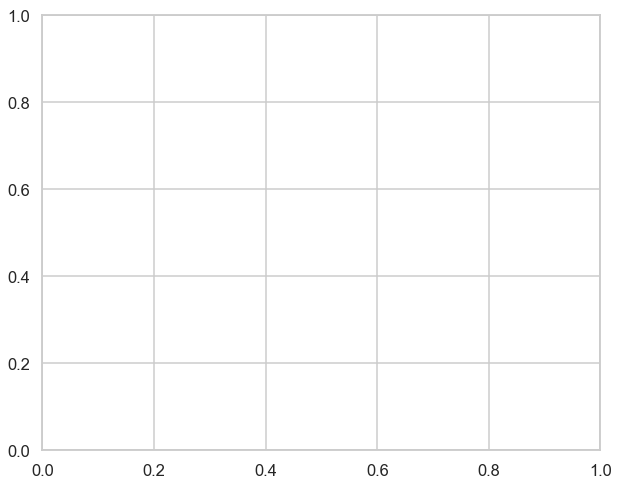

In [70]:
plt.figure(figsize=(10,8))
plt.plot(range(2, 20), ica_sil,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range(2, 20))
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for EM After ICA')
plt.show()

In [ ]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), ica_hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for EM after ICA')
plt.legend()
plt.show()

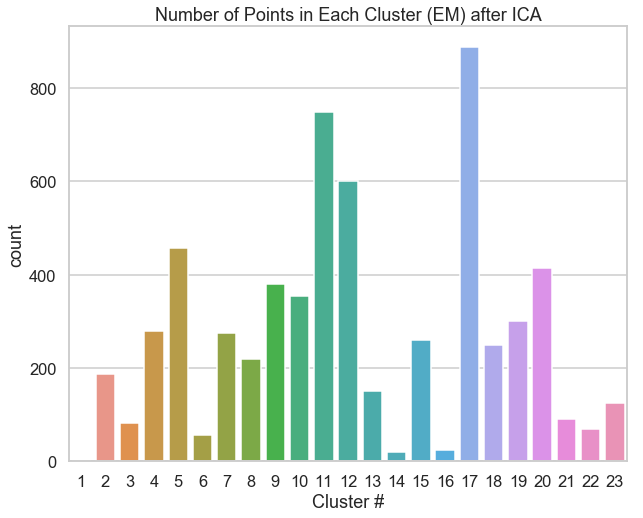

In [593]:
n_components= 23
gmm = GaussianMixture(n_components=n_components, random_state=0)
y = gmm.fit_predict(X_ica)
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster (EM) after ICA")
plt.xlabel("Cluster #")
plt.xticks(range(0,n_components),range(1,n_components+1))
plt.show()

In [ ]:
import sys
from time import time
import matplotlib
from distutils.version import LooseVersion
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}



# Part 2: perform sparse random projection of some digits images which are
# quite low dimensional and dense or documents of the 20 newsgroups dataset
# which is both high dimensional and sparse


data = X


n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.arange(2, 14)
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in tqdm(n_components_range):
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0., 2.), edgecolor='k', **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

In [ ]:
## Second run
n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

# n_components_range = np.array([300, 400, 500])
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in tqdm(n_components_range):
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components, random_state=10)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0., 2.), edgecolor='k', **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

Embedding 6238 samples with dim 617 using various random projections


  0%|          | 0/2 [00:00<?, ?it/s]

Projected 6238 samples from 617 to 300 in 0.061s
Random matrix with size: 0.092MB
Mean distances rate: 1.03 (0.08)


 50%|█████     | 1/2 [01:34<01:34, 94.30s/it]

Projected 6238 samples from 617 to 300 in 0.053s
Random matrix with size: 0.090MB
Mean distances rate: 1.05 (0.09)


100%|██████████| 2/2 [03:07<00:00, 93.97s/it]


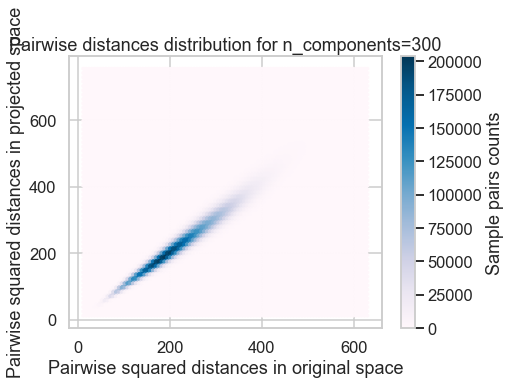

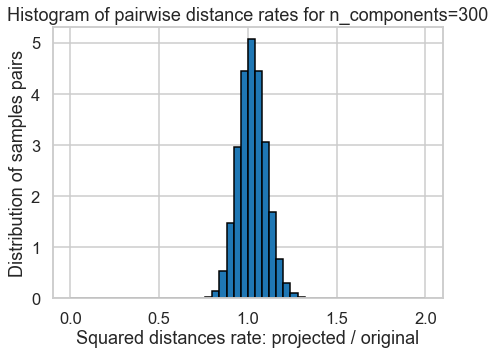

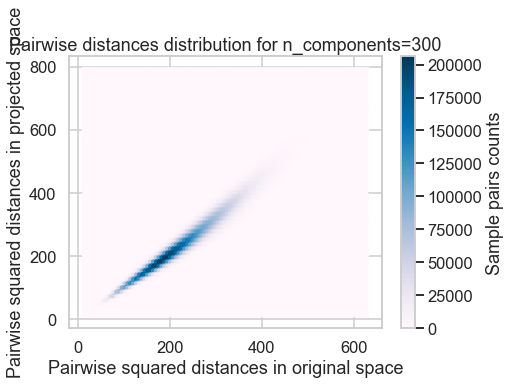

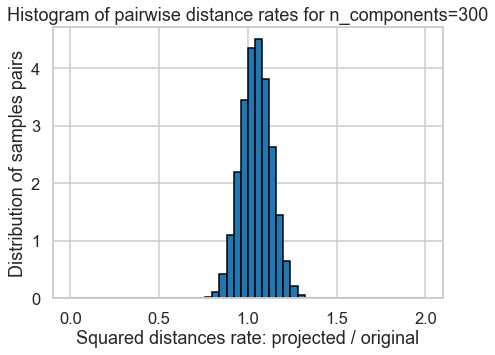

In [611]:
## Second run
n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

# n_components_range = np.array([300, 400, 500])
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]
n_components = 300
for rand in tqdm([0, 20]):
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components, random_state=rand)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure(figsize=(7, 5))
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure(figsize=(7, 5))
    plt.hist(rates, bins=50, range=(0., 2.), edgecolor='k', **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

In [607]:
rp = SparseRandomProjection(n_components=300)
X_rp = rp.fit_transform(X)

In [ ]:
elbow_curve(X_rp, kk=range(13,40))

  4%|▎         | 1/27 [00:03<01:29,  3.45s/it]

In [383]:
import numpy as np


class Kmeans(object):
    """ Kmeans implementation with Manhattan Distance Metrics """

    def __init__(self, n_clusters, max_iterations=50, snapshot_steps=1000):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.snapshot_steps = snapshot_steps

    def fit(self, X):
        """ splitting data into n_clusters clusters """
        self._centroids = self._initialize_centroids(X)
        clusters = np.zeros(X.shape[0])
        self._distances = np.zeros((X.shape[0], self.n_clusters))

        for iteration in range(self.max_iterations):
            clusters = self._find_closest_centroid(X)
            for cluster in range(self.n_clusters):
                self._centroids[cluster] = np.mean(X[clusters == cluster], axis=0)
                
        return clusters,self._centroids

    def _initialize_centroids(self, X):
        """ initialize centroids """
        return X[np.random.randint(X.shape[0], size=self.n_clusters)]

    def _find_closest_centroid(self, X):
        """ find closest centroid to each point in dataset """
        for cluster in range(self.n_clusters):
            self._distances[:, cluster] = np.sum(np.abs(X - self._centroids[cluster]), axis=1 )

        return np.argmin(self._distances, axis=1)

    def predict(self, X):
        """ predict cluster for a given set of points """
        return self._find_closest_centroid(X)